In [232]:
# for data
import pandas as pd
import numpy as np

# for visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from wordcloud import WordCloud

import nltk
nltk.download('wordnet')
nltk.download('stopwords')


# nltk used for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Preprocessing (sklearn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# scoring
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay

# styling
plt.style.use('ggplot')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [233]:
df = pd.read_csv('C:/Users/vikas/Desktop/Unstructured data/email.csv')

In [234]:
# punctuations = '''!1234567890(){}[]@#$%^&*-_=+:;/?|'''

# no_punct = ""
# for char in punctuations:
#     if (char not in punctuations):
#         no_punct = no_punct + char


In [235]:
print(df.shape)
df.head(3)

(33716, 5)


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14


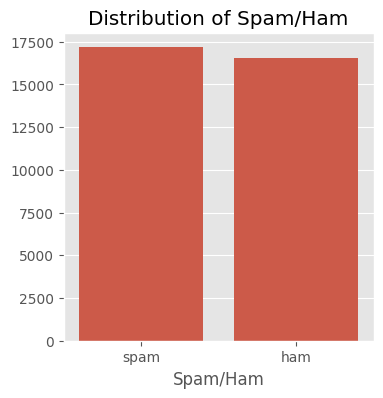

In [236]:
category = df['Spam/Ham'].value_counts()

# Create a bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x=category.index, y=category.values)
plt.title('Distribution of Spam/Ham')
plt.show()

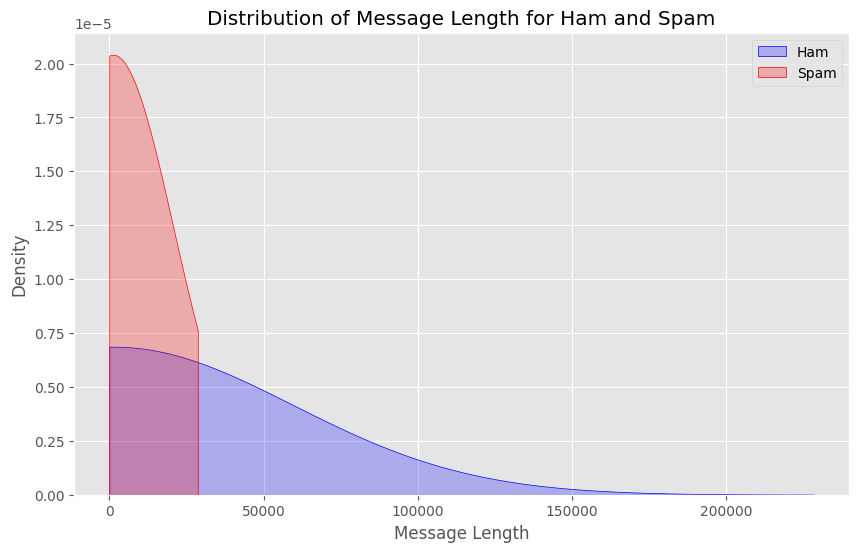

In [237]:
categories = pd.get_dummies(df["Spam/Ham"])
spam_or_not = pd.concat([df, categories], axis=1)
spam_or_not.drop('Spam/Ham',axis=1,inplace=True)

df["Message"] = df["Message"].astype(str)
df["length"] = df["Message"].apply(len)

ham = df.loc[np.where(spam_or_not['ham'] == 1)].reset_index()
spam = df.loc[np.where(spam_or_not['ham'] == 0)].reset_index()

ham.drop('index',axis=1,inplace=True)
spam.drop('index',axis=1,inplace=True)

# Create a KDE plot for ham and spam message lengths with adjusted cut parameter
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ham['length'], color='blue', label='Ham', fill=True, bw_adjust=70, cut=0)
sns.kdeplot(data=spam['length'], color='red', label='Spam', fill=True, bw_adjust=70, cut=0)

# Add labels and title
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.title('Distribution of Message Length for Ham and Spam')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [238]:
# function to get all of strings from dataframe column, and used lower function here.
def get_all_str(df):
    sentence = ''
    for i in range(len(df)):
        sentence += df['Message'][i]
    sentence = sentence.lower()
    return sentence

def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# function to get words from text(string). used RegexpTokenizer
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
#     result = result.lower()                                              
#     result = nltk.word_tokenize(text)
    return result

# function to add stopwords to nltp stopword list.
def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

# function to remove stopwords from list.
def remove_stopword(stopwords, lst):
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
    return cleanwordlist

# function to get dataframe from cleanwordlist.
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to lemmatize words
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

In [239]:
# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=100,
               colormap= colormap,
               max_font_size=140,
               min_font_size = 2,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

In [240]:
ham.tail(3)

,Message ID,Subject,Message,Spam/Ham,Date,length
16542,29213,fw : abandoned pipe ownership,"fyi , kim .\n- - - - - original message - - - ...",ham,2002-03-25,909
16543,29214,fw : tw question in amarillo,"fyi , kim .\n- - - - - original message - - - ...",ham,2002-03-25,2569
16544,29215,fw : re ivanhoe e . s . d,"fyi , kim .\n- - - - - original message - - - ...",ham,2002-03-25,1180


In [241]:
string = get_all_str(ham)
words = get_word(string)
removed = remove_stopword('1',words)
# show 10 words for example
print(removed[:10])

['nangary', 'production', 'high', 'island', 'larger', 'block', '2', 'commenced', 'saturday', '2']


In [242]:
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency', color='Term',
             color_discrete_sequence=px.colors.sequential.PuBuGn, 
             title = 'Rank of Ham Terms',
             template = "simple_white"
              )

for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"
    
fig.update_traces(textposition='inside',
                  textfont_size=11)
fig.show()

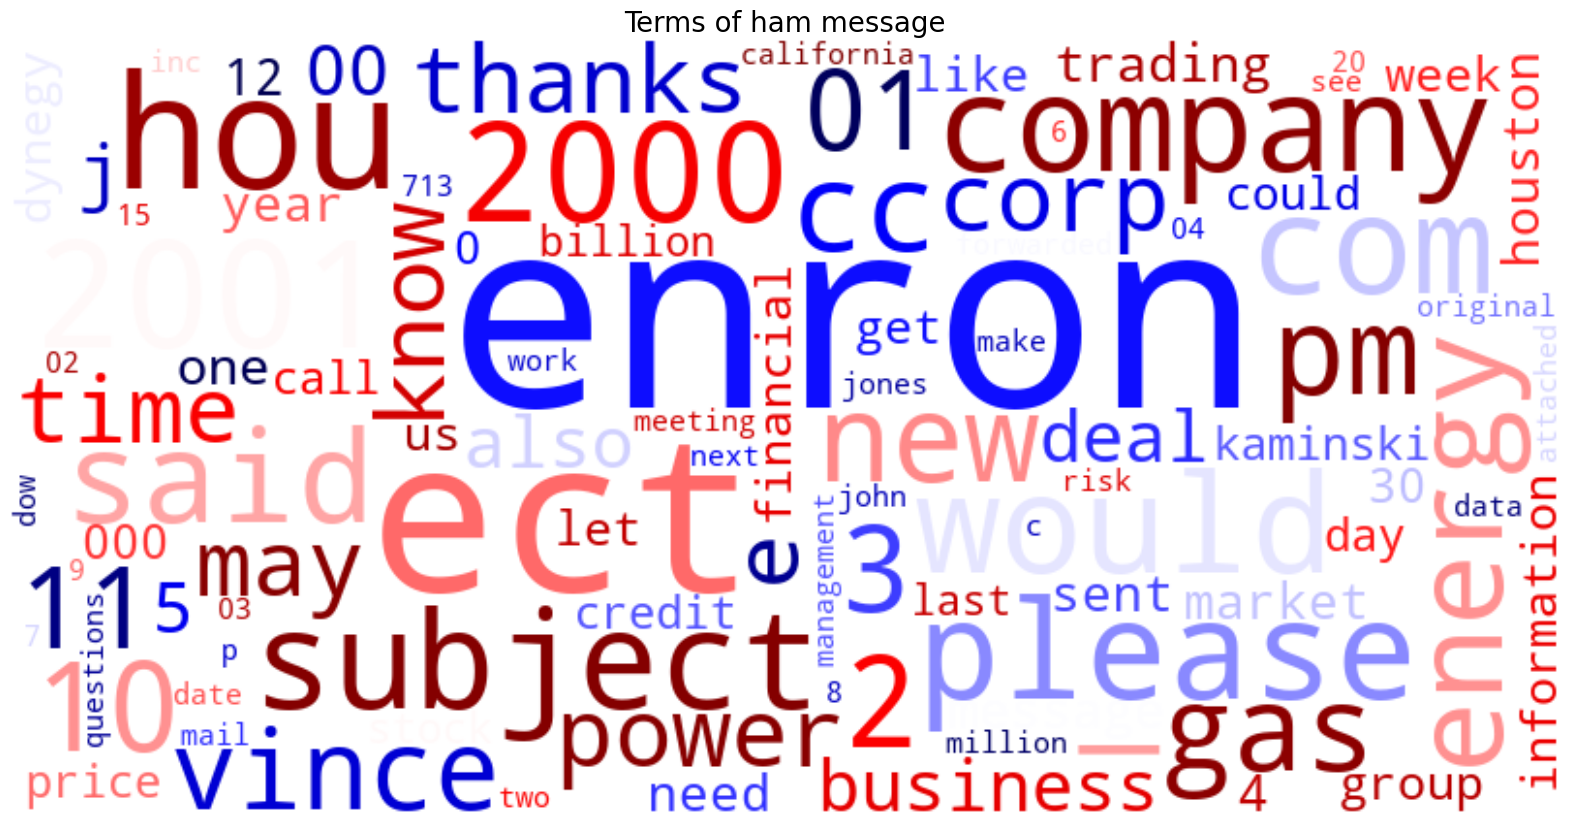

In [243]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

ham_wordcloud = Word_Cloud(data ,'white', 'seismic', 'Terms of ham message')

In [244]:
string = get_all_str(spam)
words = get_word(string)
removed = remove_stopword('1',words)

In [245]:
# plt.figure(figsize=(20,5))
# sns.barplot(data = freq_df[:10],
#             x = 'Term', y = 'Frequency')
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency',
             color_discrete_sequence=px.colors.sequential.PuRd, 
             title = 'Rank of Spam Terms', 
             template = "simple_white",
             color='Term')

for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"

fig.show()

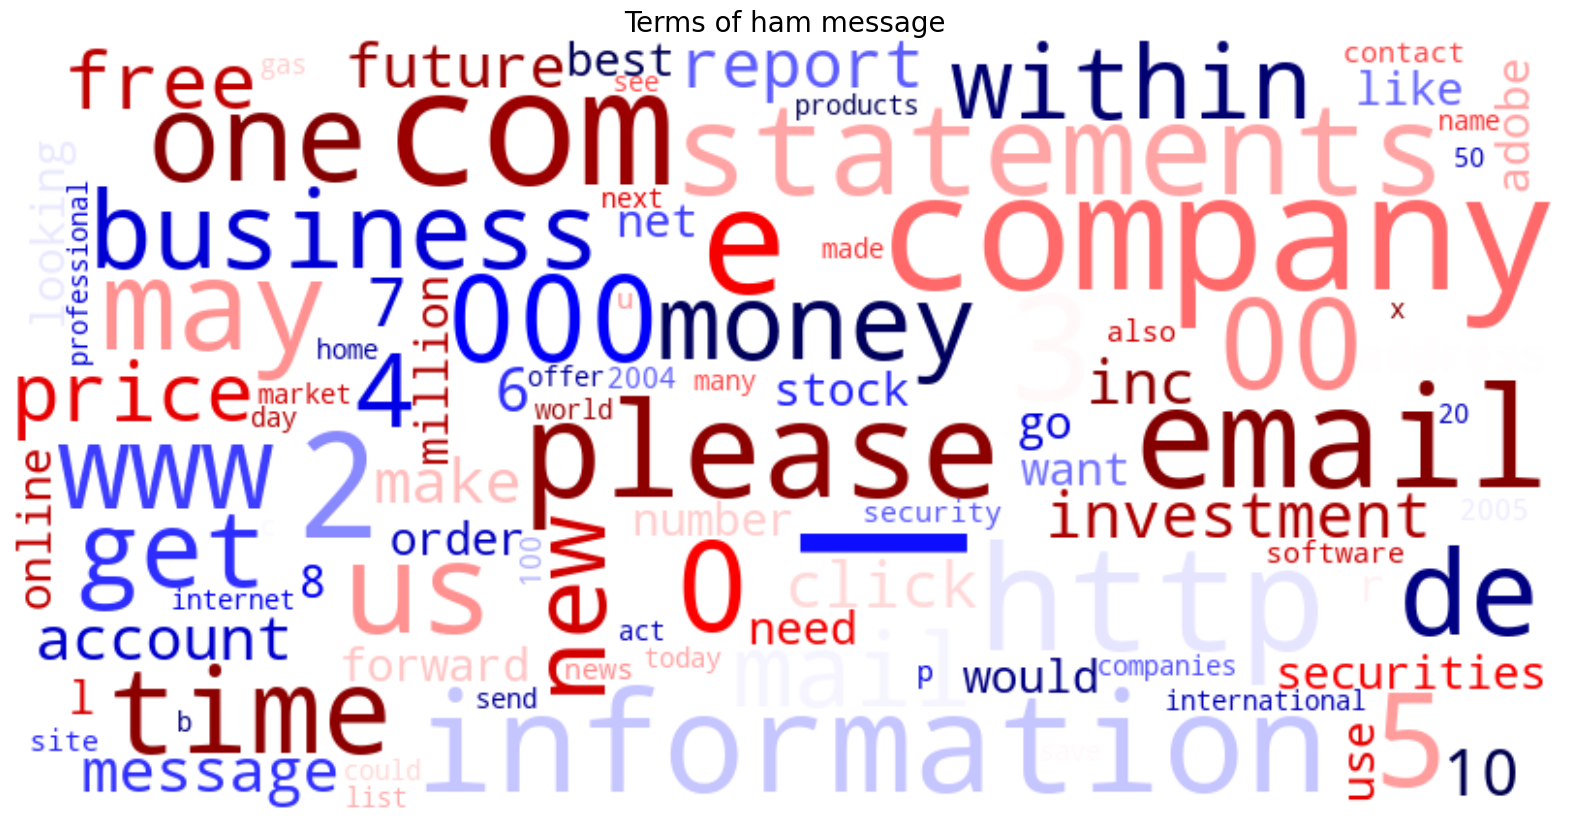

In [246]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

spam_wordcloud = Word_Cloud(data, 'white','seismic', 'Terms of ham message')

In [247]:
def preprocess(sentence):
    words = get_word(sentence)
    words_ltz = lemmatization(words)
    removed = remove_stopword('1',words_ltz)
    return removed

In [248]:
df.replace('ham',1,inplace=True)
df.replace('spam',0,inplace=True)

C:\Users\vikas\AppData\Local\Temp\ipykernel_12184\3174727624.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [249]:
def preprocess(sentence):
    words = get_word(sentence)
    words_ltz = lemmatization(words)
    removed = remove_stopword('1',words_ltz)
    return removed

vector = CountVectorizer(analyzer = preprocess)
X = vector.fit(df['Message'])
X_transform = X.transform(df['Message'])

In [250]:
tfidf_transformer = TfidfTransformer().fit(X_transform)
X = tfidf_transformer.transform(X_transform)

In [251]:
train_X, test_X, train_y, test_y = train_test_split(X, df['Spam/Ham'], test_size=0.30, random_state = 8)